<a href="https://colab.research.google.com/github/DrDAN6770/DataSciense-with-Python/blob/main/%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8%E5%B7%A5%E5%85%B7%E7%AE%B1/%E6%95%99%E7%B7%B4%E5%B8%B6%E8%B7%91/Task%2008/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 監督式學習與非監督式學習

## 監督式學習（Supervised learning）

* 是由訓練資料中學到或建立一個模型（learning model），並依此模式推測新的實例。訓練資料是由特徵和標籤所組成，目標/標籤可以是連續的數值（迴歸），也可以有限可能的類別（分類）。

* 監督式學習是一種根據已知的答案去找出欄位跟欄位之間的關係的方法

## 非監督式學習

* 沒有給定事先標記過的訓練範例，對輸入的資料進行分組或分群。無監督學習的主要運用包含：聚類分析、關聯規則、維度縮減，可以在沒有明確目標的情況下找出資料間的關係
* 非監督式學習是利用資料跟資料的關係把類似的資料當成同一群的方法

# 在 Python 中實現機器學習

## scikit-learn 套件的介紹與使用

---

用於機器學習的 Python 套件

它支持監督式學習、非監督式學習和強化學習等多種機器學習方法

scikit-learn 提供了一致的 API，讓使用者可以方便地進行模型訓練、預測和評估。它還提供了豐富的資料集和工具，用於資料預處理、特徵提取和降維等

##監督式學習

---
訓練過程中，資料樣本標有正確的標籤或結果，機器學習模型學習從輸入數據中將輸入和輸出關係建立起來的學習方式

scikit-learn 中支援多種監督式學習算法，包括：

* 線性回歸：LinearRegression、Ridge、Lasso 等。
* 分類算法：LogisticRegression、SVM、KNN、決策樹、隨機森林等。

### 線性迴歸 (Linear Regression)

---


```
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
```




In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# 載入 Boston 房價數據集
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
X, y = data, target
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [ ]:
# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# 創建線性回歸模型
model = LinearRegression()

In [ ]:
# 訓練模型
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 使用模型進行預測
y_pred = model.predict(X_test)

In [ ]:
# y_pred vs target
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 計算均方誤差
mse = mean_squared_error(y_test, y_pred)

# 計算平均絕對誤差
mae = mean_absolute_error(y_test, y_pred)

# 計算決定係數
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R^2:', r2)


Mean Squared Error: 21.51744423117753
Mean Absolute Error: 3.162709871457436
R^2: 0.7112260057484889


### 決策樹 (Decision Tree)

---

決策樹是一種樹狀模型，可以用於分類和回歸問題。在 scikit-learn 中，可以使用 DecisionTreeClassifier 和 DecisionTreeRegressor 類進行決策樹模型的建立：

```
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
```
其中，DecisionTreeClassifier 用於分類問題，DecisionTreeRegressor 用於回歸問題。


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# 分類問題範例
# 載入 iris 數據集
data = load_iris()

In [ ]:
# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

In [ ]:
# 創建分類樹模型
clf_model = DecisionTreeClassifier()

# 訓練模型
clf_model.fit(X_train, y_train)

# 使用模型進行預測
y_pred_clf = clf_model.predict(X_test)
y_pred_clf

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [ ]:
from sklearn.metrics import accuracy_score

# 計算模型在測試集上的準確率
accuracy = accuracy_score(y_test, y_pred_clf)
print('Decision Tree Classifier Accuracy:', accuracy)


Decision Tree Classifier Accuracy: 1.0


### 隨機森林 (Random Forest)

---
是一種集成學習方法，將多個決策樹組合在一起，通過投票或平均等方式來做出最終預測

在 scikit-learn 中，可以使用 RandomForestClassifier 和 RandomForestRegressor 類進行隨機森林模型的建立：



```
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
```



##### RandomForestRegressor

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 分類問題範例
# 創建 iris 自定義資料集
iris_data = {
    'sepal_length': [5.1, 4.9, 4.7, 4.6, 5.0, 6.2, 6.4, 6.0, 6.9, 6.3, 5.8, 5.4, 5.6, 5.1, 5.7],
    'sepal_width': [3.5, 3.0, 3.2, 3.1, 3.6, 2.9, 2.8, 3.0, 3.1, 2.5, 2.8, 3.0, 2.7, 3.8, 2.8],
    'petal_length': [1.4, 1.4, 1.3, 1.5, 1.4, 4.3, 5.6, 4.8, 5.1, 5.0, 4.0, 4.5, 4.2, 1.6, 4.5],
    'petal_width': [0.2, 0.2, 0.2, 0.2, 0.2, 1.3, 2.2, 1.8, 2.3, 1.9, 1.2, 1.5, 1.3, 0.2, 1.3],
    'species': ['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor']
}
# 轉換為 dataframe
iris_df = pd.DataFrame(iris_data)

In [ ]:
# 將類別變量轉換為數值變量
iris_df['species'] = pd.factorize(iris_df['species'])[0]
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,6.2,2.9,4.3,1.3,1
6,6.4,2.8,5.6,2.2,1
7,6.0,3.0,4.8,1.8,1
8,6.9,3.1,5.1,2.3,1
9,6.3,2.5,5.0,1.9,1


In [ ]:
# 分割資料為訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(iris_df.drop(columns=['sepal_length']), iris_df['sepal_length'], test_size=0.3, random_state=42)

In [ ]:
# 創建分類森林模型
reg_model = RandomForestRegressor()

# 訓練模型
reg_model.fit(X_train, y_train)

# 使用模型進行預測
y_pred_reg = reg_model.predict(X_test)
y_pred_reg

array([6.232, 5.719, 4.934, 5.109, 5.801])

In [ ]:
# 將 y_pred_reg 轉換為 DataFrame 格式
y_pred_reg_df = pd.DataFrame(y_pred_reg, columns=['y_pred_reg'])

# 合併 y_pred_reg_df 和 y_test
result = pd.concat([y_test.reset_index(drop=True), y_pred_reg_df], axis=1)

result

,species,y_pred_reg
0,virginica,6.232
1,versicolor,5.719
2,setosa,4.934
3,versicolor,5.109
4,virginica,5.801


##### RandomForestClassifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 分類問題範例
# 創建 iris 自定義資料集
iris_data = {
    'sepal_length': [5.1, 4.9, 4.7, 4.6, 5.0, 6.2, 6.4, 6.0, 6.9, 6.3, 5.8, 5.4, 5.6, 5.1, 5.7],
    'sepal_width': [3.5, 3.0, 3.2, 3.1, 3.6, 2.9, 2.8, 3.0, 3.1, 2.5, 2.8, 3.0, 2.7, 3.8, 2.8],
    'petal_length': [1.4, 1.4, 1.3, 1.5, 1.4, 4.3, 5.6, 4.8, 5.1, 5.0, 4.0, 4.5, 4.2, 1.6, 4.5],
    'petal_width': [0.2, 0.2, 0.2, 0.2, 0.2, 1.3, 2.2, 1.8, 2.3, 1.9, 1.2, 1.5, 1.3, 0.2, 1.3],
    'species': ['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor']
}

# 轉換為 dataframe
iris_df = pd.DataFrame(iris_data)

In [ ]:
# 分割資料為訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(iris_df.drop(columns=['species']), iris_df['species'], test_size=0.3, random_state=42)

# 創建分類森林模型
clf_model = RandomForestClassifier()

# 訓練模型
clf_model.fit(X_train, y_train)

# 使用模型進行預測
y_pred_clf = clf_model.predict(X_test)
y_pred_clf

array(['virginica', 'versicolor', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [ ]:
y_pred_clf = pd.Series(y_pred_clf, name = 'y_pred_clf')
y_pred_clf_df = pd.DataFrame(y_pred_clf, columns=['y_pred_clf'])
result = pd.concat([y_test.reset_index(drop=True), y_pred_clf], axis=1)
result

,species,y_pred_clf
0,virginica,virginica
1,versicolor,versicolor
2,setosa,setosa
3,versicolor,setosa
4,virginica,versicolor


### 支持向量機 (Support Vector Machine, SVM)

---
支持向量機是一種二元分類和回歸分析的機器學習方法，通過將資料映射到高維空間，尋找超平面來分類或回歸。在 scikit-learn 中，可以使用 SVM 類進行支持向量機模型的建立：


```
from sklearn.svm import SVC, SVR

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
```
其中，SVC 用於分類問題，SVR 用於回歸問題。
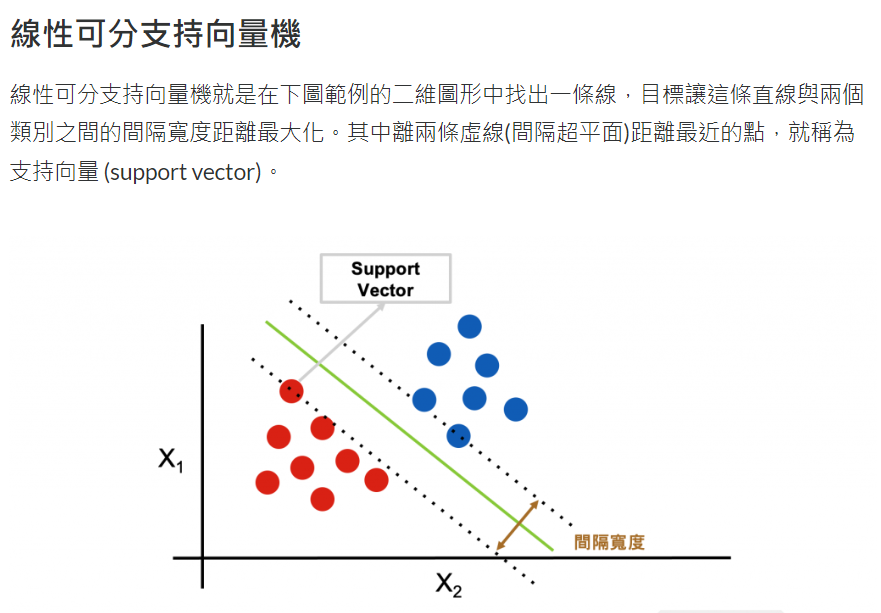

In [ ]:
import numpy as np
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split

# 自定義範例資料
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]])
y_classification = np.array([0, 0, 0, 1, 1, 1])
y_regression = np.array([1, 2, 3, 4, 5, 6])

# 切分訓練集與測試集
X_train, X_test, y_train_classification, y_test_classification, y_train_regression, y_test_regression = train_test_split(
    X, y_classification, y_regression, test_size=0.2, random_state=42)

# 使用 SVM 分類器進行分類
model = SVC()
model.fit(X_train, y_train_classification)
y_pred_classification = model.predict(X_test)

# 使用 SVR 迴歸器進行回歸
model = SVR()
model.fit(X_train, y_train_regression)
y_pred_regression = model.predict(X_test)

In [ ]:
# 合併測試集的標籤值和模型預測值
y_true_classification_and_regression = np.column_stack((y_test_classification, y_test_regression, y_pred_classification, y_pred_regression))

# 轉換成 DataFrame 對象
df = pd.DataFrame(y_true_classification_and_regression, columns=["真實分類標籤", "真實回歸標籤", "預測分類標籤", "預測回歸標籤"])
df.index.name = "樣本編號"
df

,真實分類標籤,真實回歸標籤,預測分類標籤,預測回歸標籤
樣本編號,,,,
0,0.0,1.0,1.0,4.430517
1,0.0,2.0,1.0,3.986606


## 非監督式學習

---

在訓練過程中，資料樣本沒有標籤或結果，機器學習模型通過尋找資料的結構和相似性來學習。在 scikit-learn 中，支援多種非監督式學習算法，包括：
* 聚類算法：KMeans、DBSCAN、階層分群等。
* 降維算法：PCA、t-SNE、LLE 等。

#### K-Means 聚類 (K-Means Clustering)

---

將資料分為 k 個不同的群體

```
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(X_train)
y_pred = model.predict(X_test)
```

其中，n_clusters 是要分類的群體數量

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pandas as pd

# 載入 iris 資料集
iris = load_iris()

# 轉換為 pandas dataframe
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [ ]:
# 將資料集分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立 KMeans 分群器
kmeans = KMeans(n_clusters=3, random_state=42)

# 對訓練集進行訓練
kmeans.fit(X_train)

# 對測試集進行預測
y_pred = kmeans.predict(X_test)
res = pd.concat([pd.DataFrame(y_test), pd.DataFrame(y_pred)], axis = 1)
res.columns = ['y_test', 'y_pred']
res

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,y_test,y_pred
0,1,2
1,0,0
2,2,1
3,1,2
4,1,2
5,0,0
6,1,2
7,2,1
8,1,2
9,1,2


In [ ]:
len(res[y_test == y_pred])/len(res)

0.36666666666666664

In [ ]:
from sklearn import metrics
# Adjusted Rand Index 的值介於 -1 和 1 之間，值越接近 1 表示聚類結果與實際標籤越相符
score = metrics.adjusted_rand_score(y_test, y_pred)
print(score) # 0.8981703936425799

0.8981703936425799


#### 主成分分析 (Principal Component Analysis, PCA)

---
是一種降維算法，通過將高維資料映射到低維空間，保留最重要的特徵來簡化資料

```
from sklearn.decomposition import PCA

model = PCA(n_components=2)
X_train_pca = model.fit_transform(X_train)
X_test_pca = model.transform(X_test)
```

其中，n_components 是要降維到的維度數量


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# 讀取手寫數字資料集
digits = load_digits()

# 將特徵與標籤拆開
X = digits.data
y = digits.target

# 切分資料集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立PCA模型，將64維的特徵轉換為2維
model = PCA(n_components=2)
X_train_pca = model.fit_transform(X_train)
X_test_pca = model.transform(X_test)

# 顯示轉換後的訓練集資料
df = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2'])
df['target'] = y_train
print(df.head())

         PC1        PC2  target
0  16.468294  19.392496       6
1  -3.066058  22.375263       0
2  13.134395  20.354285       0
3 -22.619748  -5.528612       3
4  -2.003769  23.617270       0


開始測試，SVC、Decision tree、random forest、CNN

In [ ]:
from sklearn.svm import SVC

# 建立SVM模型
svm_model = SVC(C=1, gamma=0.001)

# 使用原始特徵進行訓練
svm_model.fit(X_train, y_train)

# 使用原始特徵進行預測
y_pred = svm_model.predict(X_test)

# 計算模型準確率
accuracy = svm_model.score(X_test, y_test)
print(f"SVM Accuracy: {accuracy}")


SVM Accuracy: 0.9888888888888889


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 建立決策樹模型
tree_model = DecisionTreeClassifier(max_depth=10)

# 使用原始特徵進行訓練
tree_model.fit(X_train, y_train)

# 使用原始特徵進行預測
y_pred = tree_model.predict(X_test)

# 計算模型準確率
accuracy = tree_model.score(X_test, y_test)
print(f"Decision Tree Accuracy: {accuracy}")


Decision Tree Accuracy: 0.8638888888888889


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 建立隨機森林模型
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10)

# 使用原始特徵進行訓練
rf_model.fit(X_train, y_train)

# 使用原始特徵進行預測
y_pred = rf_model.predict(X_test)

# 計算模型準確率
accuracy = rf_model.score(X_test, y_test)
print(f"Random Forest Accuracy: {accuracy}")


Random Forest Accuracy: 0.9694444444444444


In [ ]:
# DL CNN
import tensorflow as tf
from tensorflow import keras

# 將原始特徵轉換成圖像
X_train = X_train.reshape(-1, 8, 8, 1)
X_test = X_test.reshape(-1, 8, 8, 1)

# 建立CNN模型
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(8,8,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

# 編譯模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 訓練模型
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 評估模型
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"CNN Accuracy: {test_acc}")


Epoch 1/10
45/45 [==============================] - 2s 10ms/step - loss: 2.0852 - accuracy: 0.3556
Epoch 2/10
45/45 [==============================] - 0s 8ms/step - loss: 0.5892 - accuracy: 0.8587
Epoch 3/10
45/45 [==============================] - 0s 6ms/step - loss: 0.2907 - accuracy: 0.9304
Epoch 4/10
45/45 [==============================] - 0s 7ms/step - loss: 0.1951 - accuracy: 0.9631
Epoch 5/10
45/45 [==============================] - 0s 9ms/step - loss: 0.1449 - accuracy: 0.9708
Epoch 6/10
45/45 [==============================] - 0s 6ms/step - loss: 0.1157 - accuracy: 0.9798
Epoch 7/10
45/45 [==============================] - 0s 6ms/step - loss: 0.0916 - accuracy: 0.9826
Epoch 8/10
45/45 [==============================] - 0s 7ms/step - loss: 0.0766 - accuracy: 0.9861
Epoch 9/10
45/45 [==============================] - 0s 8ms/step - loss: 0.0667 - accuracy: 0.9868
Epoch 10/10
12/12 [==============================] - 1s 6ms/step - loss: 0.0822 - accuracy: 0.9833
CNN Accuracy: 0.98